In [3]:
!pip install sklearn_extensions

  Created wheel for sklearn-extensions: filename=sklearn_extensions-0.0.2-py2.py3-none-any.whl size=24577 sha256=0be9b0f2f9dfa15d8a08d3ddaac7828583cf5edffa204ffc4ab0214a90d8fb38
  Stored in directory: /root/.cache/pip/wheels/b5/26/b2/09100728168b45e4de834b943a588028744fdfaa9ac979ffb2
Successfully built sklearn-extensions


In [6]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jun  3 03:25:32 2019

@author: felip
"""

# -*- coding: utf-8 -*-
"""
Created on Thu May 30 16:05:38 2019

@author: felip
"""
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics 

from keras.models import Sequential, Model
from keras.layers import Input, Dense
#necessita do pydot pip install pydot
from keras.utils import plot_model
import matplotlib.pyplot as plt


url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
titanic_data = titanic.drop(['PassengerId','Name','Ticket','Cabin'], 1)

def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

Using TensorFlow backend.


In [0]:
titanic_data['Age'] = titanic_data[['Age', 'Pclass']].apply(age_approx, axis=1)
titanic_data.dropna(inplace=True)
gender = pd.get_dummies(titanic_data['Sex'],drop_first=True)
embark_location = pd.get_dummies(titanic_data['Embarked'],drop_first=True)
titanic_data.drop(['Sex', 'Embarked'],axis=1,inplace=True)
titanic_dmy = pd.concat([titanic_data,gender,embark_location],axis=1)
titanic_dmy.drop(['Pclass'],axis=1,inplace=True)
titanic_dmy.drop(['Q'],axis=1,inplace=True)

X = titanic_dmy.iloc[:,[1,2,3,4,5,6]].values
y = titanic_dmy.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [17]:
# Cria o Modelo Funcional
inputs = Input(shape=(6,))
x = Dense(24,  activation='relu')(inputs)
x = Dense(24,  activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

modelFunc = Model(inputs =inputs, outputs =  predictions)
modelFunc.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
historyFunc  = modelFunc.fit(X_train, y_train, epochs=300, batch_size=10)

Epoch 1/300
622/622 [==============================] - 1s 805us/step - loss: 0.7122 - acc: 0.6817
Epoch 2/300
622/622 [==============================] - 0s 136us/step - loss: 0.6173 - acc: 0.6945
Epoch 3/300
622/622 [==============================] - 0s 130us/step - loss: 0.5942 - acc: 0.7058
Epoch 4/300
622/622 [==============================] - 0s 130us/step - loss: 0.5886 - acc: 0.7186
Epoch 5/300
622/622 [==============================] - 0s 123us/step - loss: 0.5589 - acc: 0.7058
Epoch 6/300
622/622 [==============================] - 0s 131us/step - loss: 0.5666 - acc: 0.7251
Epoch 7/300
622/622 [==============================] - 0s 131us/step - loss: 0.5649 - acc: 0.7267
Epoch 8/300
622/622 [==============================] - 0s 134us/step - loss: 0.5402 - acc: 0.7170
Epoch 9/300
622/622 [==============================] - 0s 131us/step - loss: 0.5411 - acc: 0.7138
Epoch 10/300
622/622 [==============================] - 0s 133us/step - loss: 0.5201 - acc: 0.7267
Epoch 11/300
622/62

In [18]:
scores = modelFunc.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (modelFunc.metrics_names[1], scores[1]*100))

267/267 [==============================] - 0s 509us/step

acc: 79.03%


In [19]:
print(modelFunc.summary())

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 6)                 0         
_________________________________________________________________
dense_16 (Dense)             (None, 24)                168       
_________________________________________________________________
dense_17 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 25        
Total params: 793
Trainable params: 793
Non-trainable params: 0
_________________________________________________________________
None


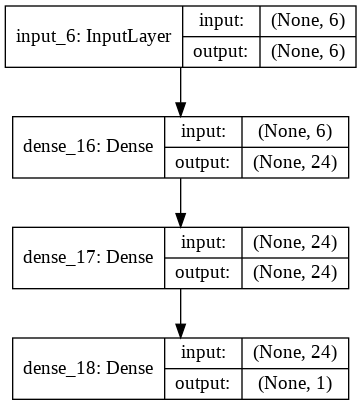

In [20]:
plot_model(modelFunc, to_file='mlp-func.png', show_shapes=True, show_layer_names=True)

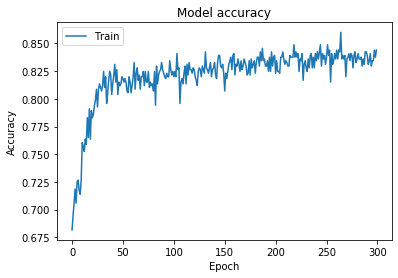

<Figure size 1440x1080 with 0 Axes>

In [21]:
# Plot training & validation accuracy values
plt.plot(historyFunc.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.figure(figsize=(20,15))
plt.show()